# **Task 3: Forest Cover Type Classification**

• Predict the type of forest cover based on cartographic and environmental features.

• Clean and preprocess the data including categorical handling.

• Train and evaluate multi-class classification models

• Visualize confusion matrix and feature importance

In [3]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance
import seaborn as sns

In [4]:
# Since the dataset doesnt have any col names, we will put them manually by looking at the covertype.info
columns = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

# Wilderness Areas
wilderness = [f"Wilderness_Area{i}" for i in range(1, 5)]

# Soil Types
soil = [f"Soil_Type{i}" for i in range(1, 41)]

# Target
target = ["Cover_Type"]

# Combine all
all_columns = columns + wilderness + soil + target

# or 
# columns = [
#     "Elevation", "Aspect", "Slope",
#     "Horizontal_Distance_To_Hydrology", 
#     "Vertical_Distance_To_Hydrology",
#     "Horizontal_Distance_To_Roadways",
#     "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
#     "Horizontal_Distance_To_Fire_Points"
# ] + [f"Wilderness_Area{i}" for i in range(1, 5)] \
#   + [f"Soil_Type{i}" for i in range(1, 41)] \
#   + ["Cover_Type"]

# Load dataset
df = pd.read_csv("covtype.data.gz", header=None, names=all_columns)

print(df.shape)
df.head()

(581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# Split the data into Input (X) and Output (Y)
X = df.iloc[:, 0:54]
y = df['Cover_Type']
y = y-1

### **Train and evaluate** 

In [6]:
# Split the data set into trian and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

## Random Forest 

In [7]:
# train a base model
rf = RandomForestClassifier() #n_estimator means ke kitny trees bnany hain, default is also 100 
rf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# predictions 
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 1, 1, ..., 1, 1, 6], shape=(116203,))

In [9]:
# Evaluate 
print("Accurany Score: ", accuracy_score(y_test, y_pred_rf))
print("Classification Report: ", classification_report(y_test, y_pred_rf))

Accurany Score:  0.9552765419137199
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.94      0.95     42557
           1       0.95      0.97      0.96     56500
           2       0.95      0.97      0.96      7121
           3       0.92      0.85      0.88       526
           4       0.94      0.77      0.85      1995
           5       0.94      0.90      0.92      3489
           6       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



### Confusion Matrix 
A confusion matrix is a table that shows how well a classification model is performing by comparing the actual labels with the predicted labels.

It helps you see where the model is making correct predictions and where it is making mistakes (e.g., misclassifying one class as another).

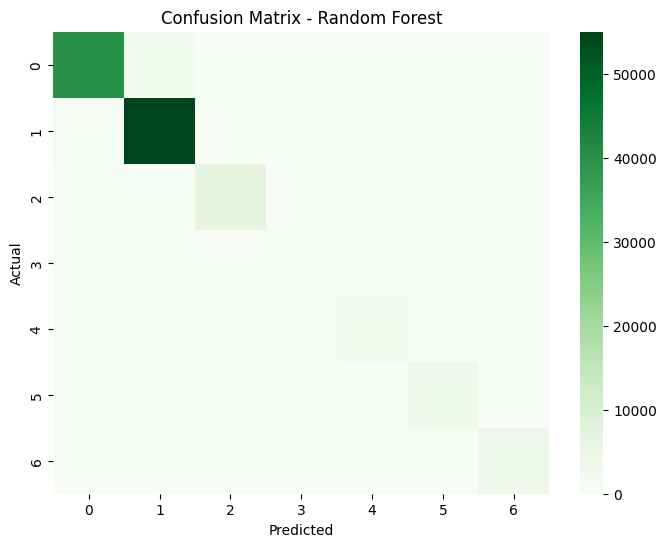

In [10]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Greens")  
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Feature Importance 
Feature importance tells you which features (columns) of the dataset are most useful for making predictions in the model.

Higher importance = that feature has a bigger impact on the final decision.

Feature: 0, Score: 0.24451
Feature: 1, Score: 0.04754
Feature: 2, Score: 0.03222
Feature: 3, Score: 0.06051
Feature: 4, Score: 0.05742
Feature: 5, Score: 0.11653
Feature: 6, Score: 0.04086
Feature: 7, Score: 0.04359
Feature: 8, Score: 0.04103
Feature: 9, Score: 0.11195
Feature: 10, Score: 0.01075
Feature: 11, Score: 0.00604
Feature: 12, Score: 0.01169
Feature: 13, Score: 0.03117
Feature: 14, Score: 0.00121
Feature: 15, Score: 0.00926
Feature: 16, Score: 0.00240
Feature: 17, Score: 0.01203
Feature: 18, Score: 0.00043
Feature: 19, Score: 0.00314
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00004
Feature: 22, Score: 0.00012
Feature: 23, Score: 0.01205
Feature: 24, Score: 0.00265
Feature: 25, Score: 0.00973
Feature: 26, Score: 0.00406
Feature: 27, Score: 0.00033
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00078
Feature: 30, Score: 0.00178
Feature: 31, Score: 0.00023
Feature: 32, Score: 0.00096
Feature: 33, Score: 0.00183
Feature: 34, Score: 0.00069
Feature: 35, Score: 0.01448
Fe

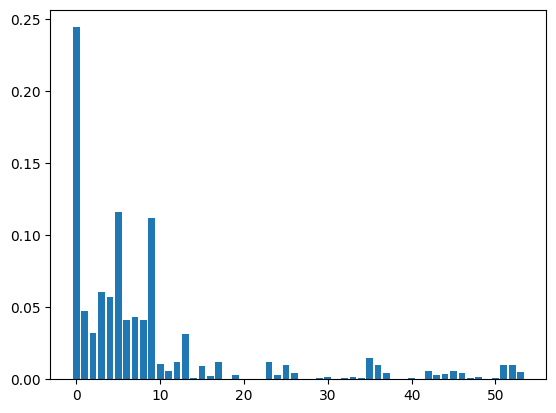

In [11]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## **BONUS:** 

## **XGBoost**

In [12]:
# train the base model 
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=42)
xgb.fit(X_train, y_train)

C:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:31:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [13]:
# predictions 
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([0, 1, 1, ..., 1, 1, 6], shape=(116203,))

In [14]:
# Evaluate 
print("Accurany Score: ", accuracy_score(y_test, y_pred_xgb))
print("Classification Report: ", classification_report(y_test, y_pred_xgb))

Accurany Score:  0.8711823274786366
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
           3       0.91      0.86      0.89       526
           4       0.89      0.59      0.71      1995
           5       0.85      0.82      0.83      3489
           6       0.94      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.87      0.87      0.87    116203



### Confusion matrix

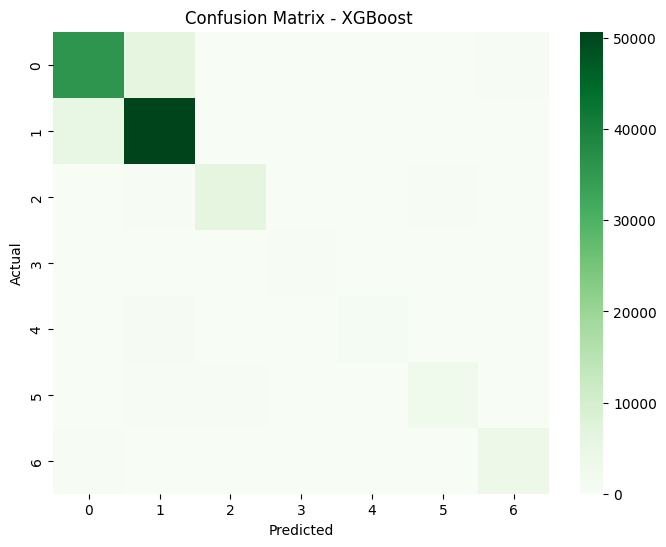

In [15]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Greens")  
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost ")
plt.show()

### Feature importance 

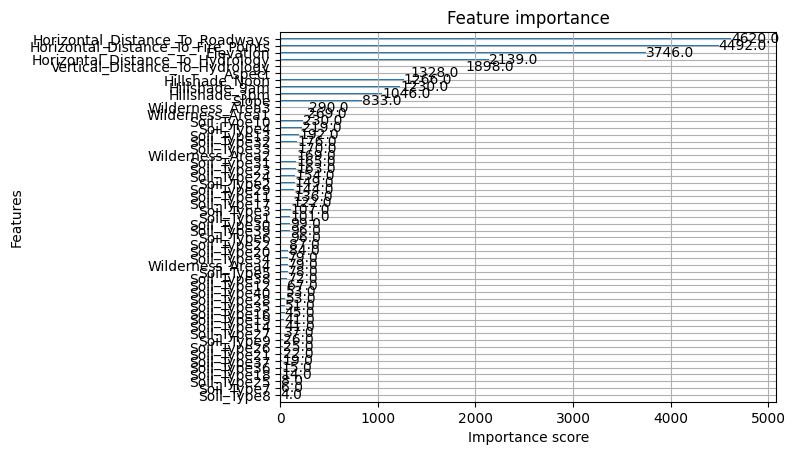

In [16]:
plot_importance(xgb)
plt.show()

## **Comparing Random Forest and XGBoost**

## **Hyperparameter tuning**

In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200], # trees kitne banane hain
    'max_depth': [3, 5, 7],  # tree ki depth (complexity)
    'learning_rate': [0.1, 0.01, 0.001]  # step size (small = slow but stable)
}


random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=5,   # only test 5 random combos
    scoring='accuracy',
    cv=2,
    verbose=1,
    n_jobs=1,
    random_state=42,
)

random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:50:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:50:27] WARNING: C:\actions-r

Best Params: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
Best Accuracy: 0.8638064212878025
